# Assist Heatmaps
This notebook helps walk through how to generate the assist heatmaps.

In [1]:
"""
Import nescassary packages
"""
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nba_help import plotting, get_basic_statistics
import numpy as np
from jupyterthemes import jtplot
import SeabornFig2Grid as sfg
import matplotlib.gridspec as gridspec

In [2]:
jtplot.style('chesterish', grid=False) #the correct theme for the grid

In [3]:
positions = np.load('positions.npy', allow_pickle='TRUE').item() # get all positions

## Load both dataframes (makes and misses) for assists

In [4]:
score_assist_defend_make_df = pd.read_csv("data/aggregated/assist_new_algo.csv")
score_assist_defend_miss_df = pd.read_csv("data/aggregated/miss_new_algo.csv")

In [5]:
"""
Get heatmap for a shot location on the court
"""
def get_plot_by_loc(location, score_assist, name=None, team=None):
    sub_df = score_assist.loc[score_assist['LocationScorer'] == location]
    if name != None:
        sub_df = sub_df.loc[sub_df['AssistorName'] == name]
    ax1 = plotting.plot_static(sub_df['AssistorX'], sub_df['AssistorY'])
    return ax1

In [6]:
"""
Get heatmap for a player
"""
def get_plot_by_player(name, score_assist_miss, score_assist_make):
    print(name)
    fig = plt.figure(figsize=(7.5,4))
    player_name = get_basic_statistics.get_id_from_name(name)
    sub_df_miss = score_assist_miss.loc[score_assist_miss['AssistorName'] == player_name]
    sub_df_make = score_assist_make.loc[score_assist_make['AssistorName'] == player_name]
    print(len(sub_df_miss), len(sub_df_make))
    gs = gridspec.GridSpec(1, 2)
    ax1 = plotting.plot_static(sub_df_make['AssistorX'], sub_df_make['AssistorY'])
    ax1.set_axis_labels('', '', fontsize=16)
    ax1.ax_joint.set_xticks([])
    ax1.ax_joint.set_yticks([])
    mg0 = sfg.SeabornFig2Grid(ax1, fig, gs[0])
    ax2 = plotting.plot_static(sub_df_miss['AssistorX'], sub_df_miss['AssistorY'])
    ax2.set_axis_labels('', '', fontsize=16)
    ax2.ax_joint.set_xticks([])
    ax2.ax_joint.set_yticks([])
    mg1 = sfg.SeabornFig2Grid(ax2, fig, gs[1])
    gs.tight_layout(fig)
    plt.show()

In [7]:
"""
Get heatmap for team
"""
def get_plot_for_teams(name, title, score_assist_make, score_assist_miss):
    print(name)
    sub_df_make = score_assist_make.loc[score_assist_make['TeamName'] == name]
    sub_df_miss = score_assist_miss.loc[score_assist_miss['TeamName'] == name]
    ax = plotting.plot_static(sub_df_make['AssistorX'], sub_df_make['AssistorY'])
    plt.show()
    ax = plotting.plot_static(sub_df_miss['AssistorX'], sub_df_miss['AssistorY'])
    plt.show()

In [8]:
"""
Get dataframe for a certain player position
"""
def get_sub_df_by_position(position, score_assist, positions=positions):
    sub_df = score_assist.loc[score_assist['AssistorName'].isin(positions[position])]
    return sub_df

In [9]:
"""
Get dataframe for a certain team
"""
def get_sub_df_by_team(team, score_assist):
    sub_df = score_assist.loc[score_assist['TeamName'] == team]
    return sub_df

In [10]:
"""
Get grid for all of the shot locations.

Column is (1) make (2) miss
Rows are "AboveTheBreak3", "Midrange2", "Paint", "Corner3", "Corner2" in that order

"""
def get_grid(make_df, miss_df):
    fig = plt.figure(figsize=(7.5,20))
    gs = gridspec.GridSpec(5, 2)
    for i, loc in enumerate(["AboveTheBreak3", "Midrange2", "Paint", "Corner3", "Corner2"]):
        ax1 = get_plot_by_loc(loc, score_assist=make_df)
        ax1.set_axis_labels('', '', fontsize=16)
        ax1.ax_joint.set_xticks([])
        ax1.ax_joint.set_yticks([])
        mg0 = sfg.SeabornFig2Grid(ax1, fig, gs[i*2])
        ax2 = get_plot_by_loc(loc, score_assist=miss_df)
        ax2.set_axis_labels('', '', fontsize=16)
        ax2.ax_joint.set_xticks([])
        ax2.ax_joint.set_yticks([])
        mg1 = sfg.SeabornFig2Grid(ax2, fig, gs[(i*2)+1])
    gs.tight_layout(fig)
    plt.show()

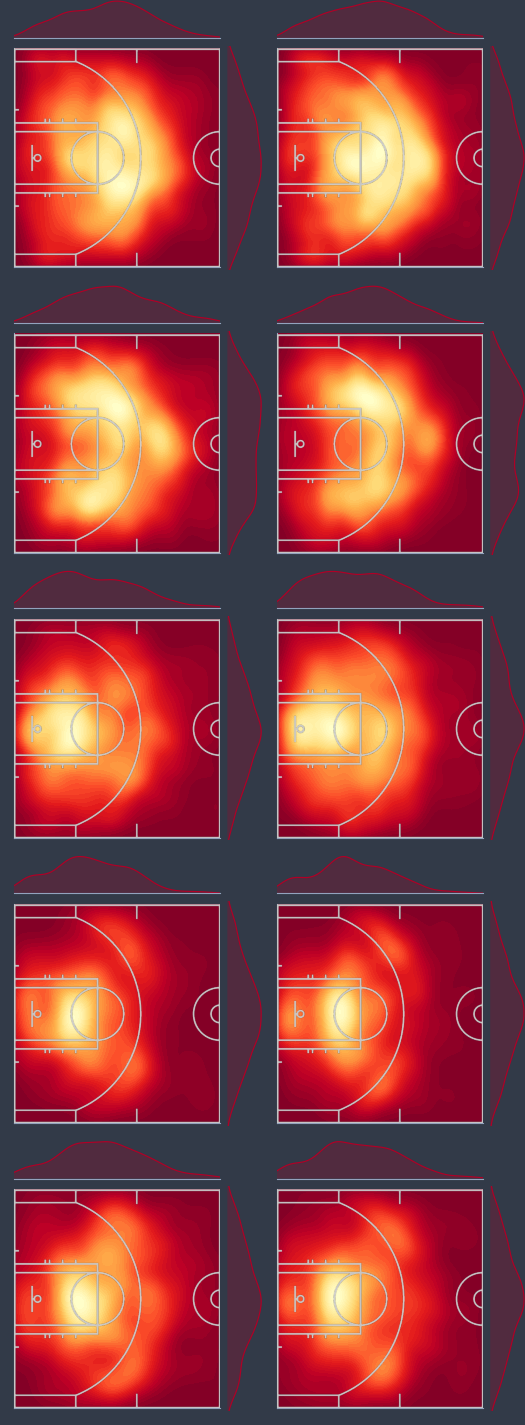

In [11]:
get_grid(score_assist_defend_make_df, score_assist_defend_miss_df)

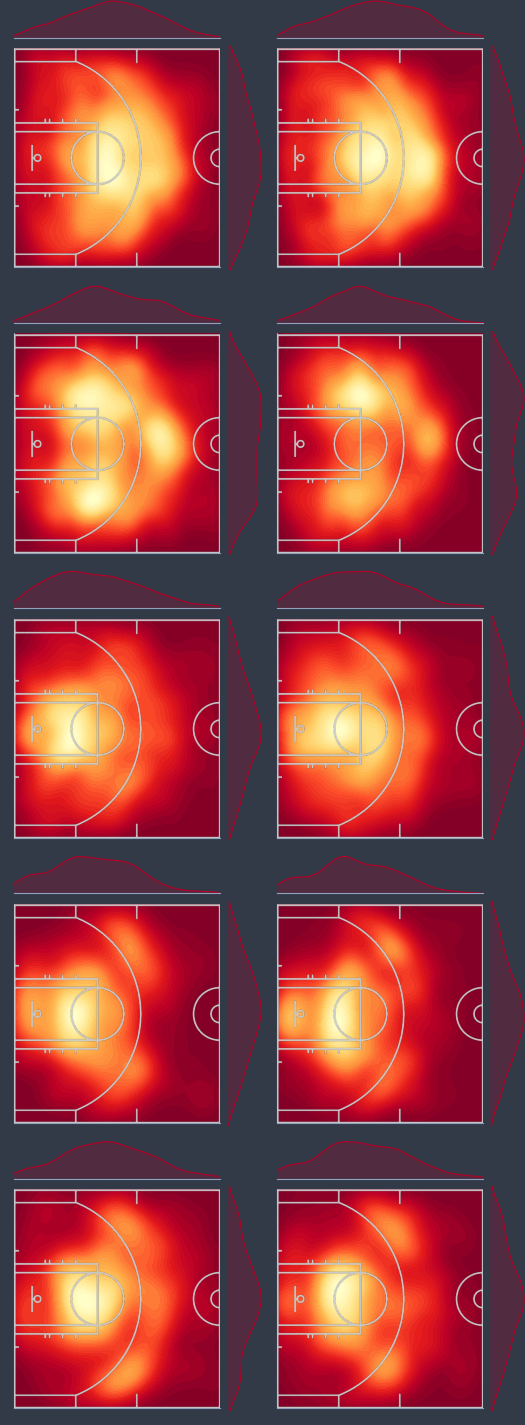

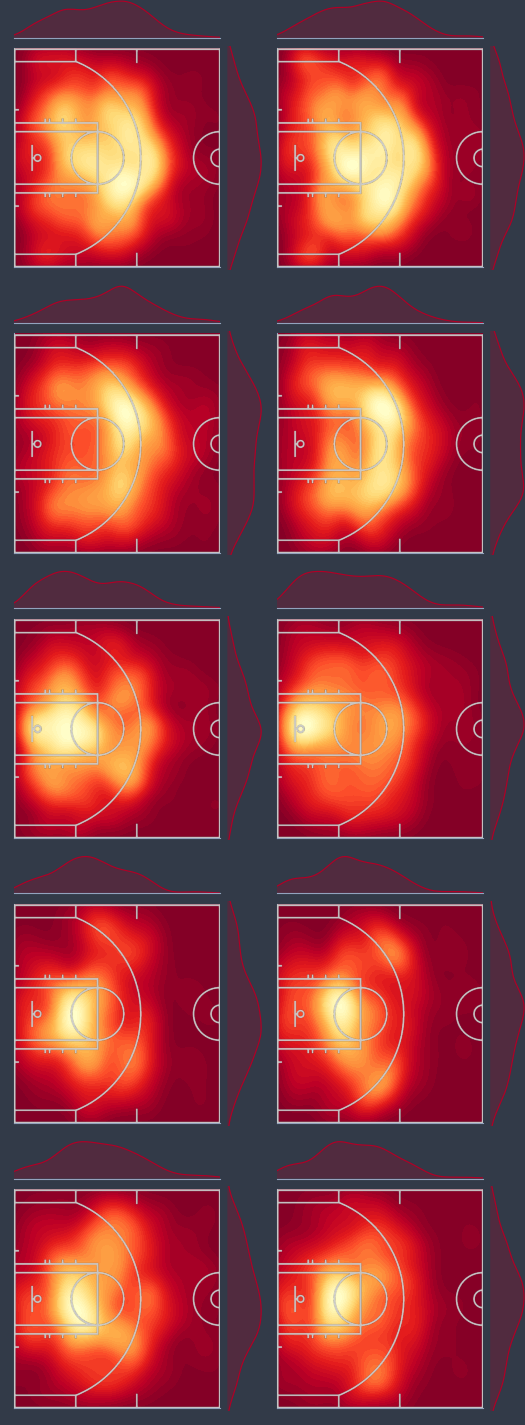

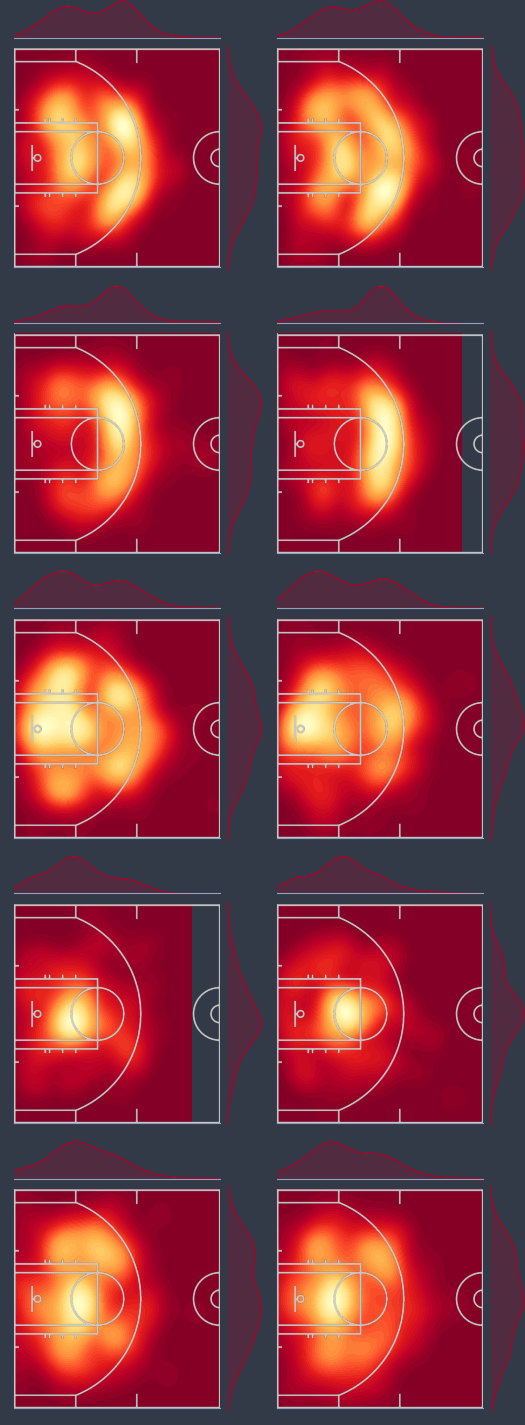

In [21]:
guard_make = get_sub_df_by_position('G', score_assist=score_assist_defend_make_df)
guard_miss = get_sub_df_by_position('G', score_assist=score_assist_defend_miss_df)
forward_make = get_sub_df_by_position('F', score_assist=score_assist_defend_make_df)
forward_miss = get_sub_df_by_position('F', score_assist=score_assist_defend_miss_df)
center_make = get_sub_df_by_position('C', score_assist=score_assist_defend_make_df)
center_miss = get_sub_df_by_position('C', score_assist=score_assist_defend_miss_df)
get_grid(guard_make, guard_miss)
get_grid(forward_make, forward_miss)
get_grid(center_make, center_miss)

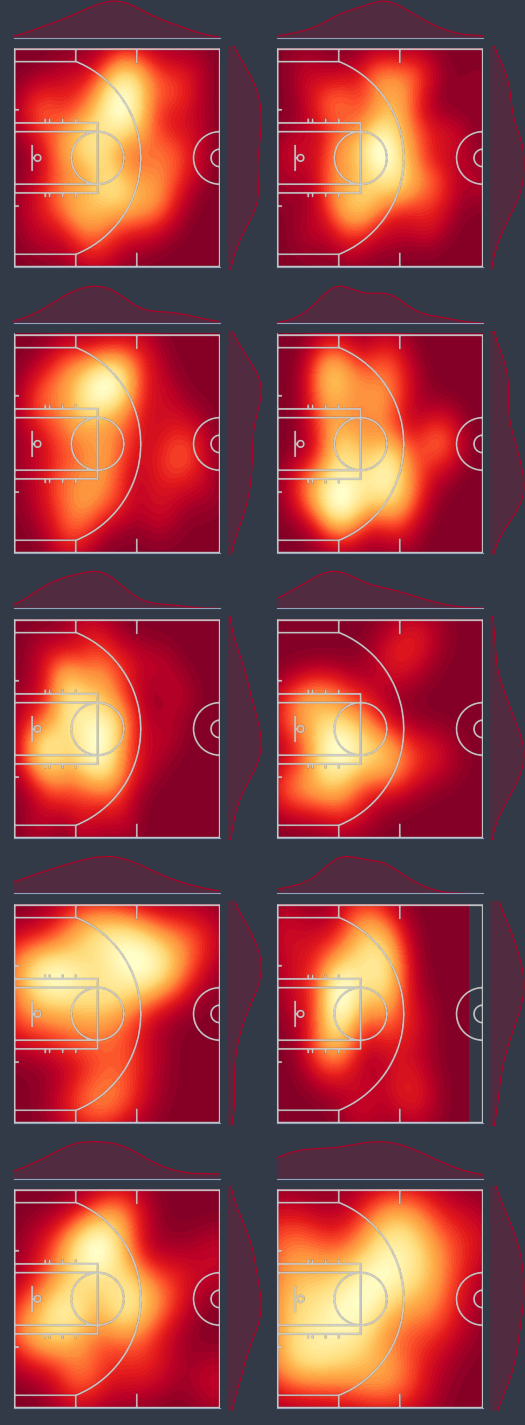

In [93]:
for team in ["LAL"]:
    miss = get_sub_df_by_team(team, score_assist_defend_miss_df)
    make = get_sub_df_by_team(team, score_assist_defend_make_df)
    get_grid(make, miss)

LeBron James
98 83


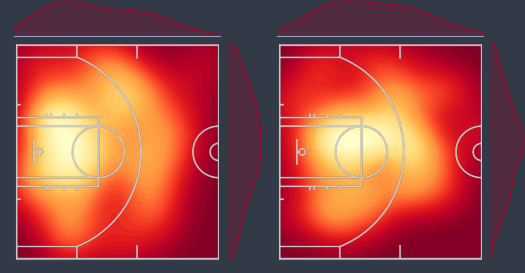

In [115]:
get_plot_by_player('LeBron James', score_assist_defend_miss_df, score_assist_defend_make_df)